## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

✅ Data saved to sensor_data.csv


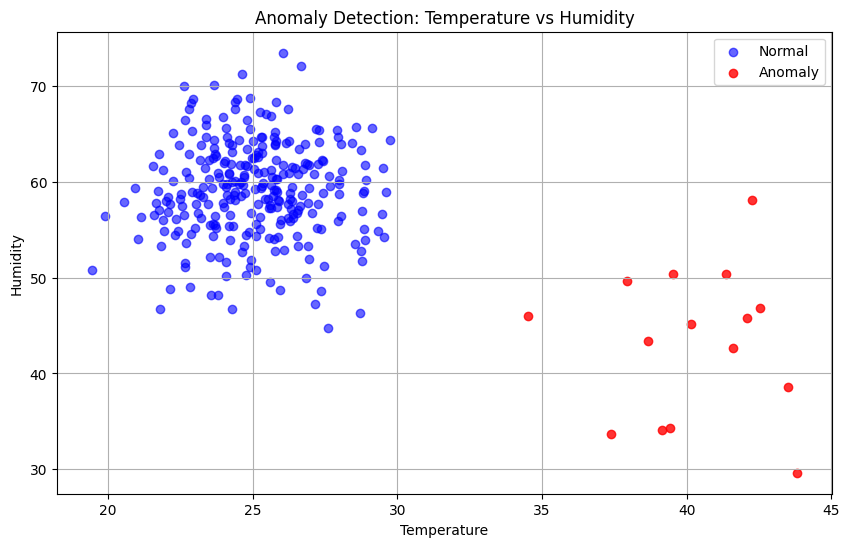

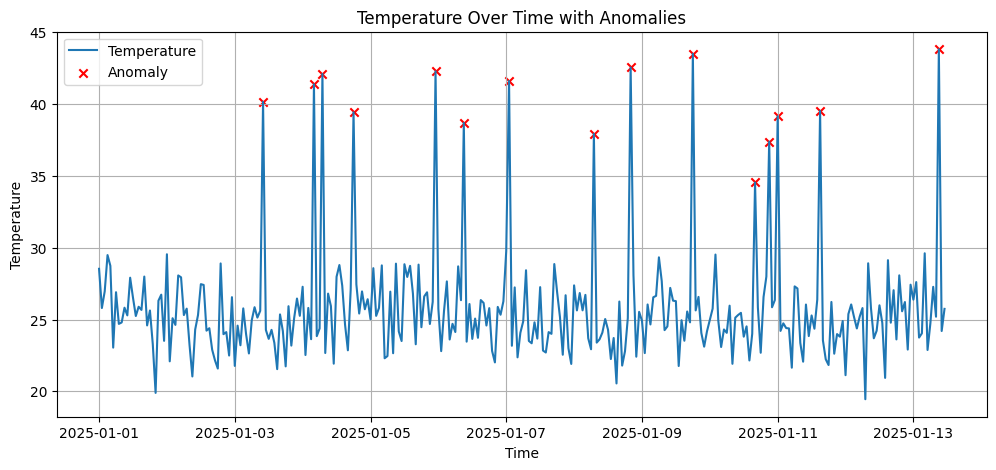

✅ Anomaly detection complete.
Number of anomalies found: 15


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import os


# ---------------------------
# Function: Generate synthetic sensor data
# ---------------------------
def generate_sensor_data(filename="sensor_data.csv", n_samples=300, seed=0):
    np.random.seed(seed)
    timestamps = pd.date_range(start='2025-01-01', periods=n_samples, freq='H')
    temperature = np.random.normal(25, 2, n_samples)
    humidity = np.random.normal(60, 5, n_samples)
    vibration = np.random.normal(0.3, 0.05, n_samples)

    anomaly_indices = np.random.choice(n_samples, size=15, replace=False)
    temperature[anomaly_indices] += np.random.uniform(10, 20, size=15)
    humidity[anomaly_indices] -= np.random.uniform(10, 30, size=15)
    vibration[anomaly_indices] += np.random.uniform(0.4, 0.7, size=15)

    df = pd.DataFrame({
        'timestamp': timestamps,
        'temperature': temperature,
        'humidity': humidity,
        'vibration': vibration
    })

    try:
        df.to_csv(filename, index=False)
        print(f"✅ Data saved to {filename}")
    except Exception as e:
        print(f"❌ Error saving file: {e}")


# ---------------------------
# Function: Load and preprocess data
# ---------------------------
def load_data(filename="sensor_data.csv"):
    try:
        df = pd.read_csv(filename)
        if not all(col in df.columns for col in ['temperature', 'humidity', 'vibration']):
            raise ValueError("Missing required columns in data.")
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        return df
    except FileNotFoundError:
        print("❌ File not found.")
    except Exception as e:
        print(f"❌ Error loading data: {e}")
    return None


# ---------------------------
# Function: Apply Isolation Forest
# ---------------------------
def detect_anomalies(df, contamination=0.05):
    X = df[['temperature', 'humidity', 'vibration']]
    model = IsolationForest(n_estimators=100, contamination=contamination, random_state=0)
    df['anomaly'] = model.fit_predict(X)
    return df


# ---------------------------
# Function: Plot results
# ---------------------------
def plot_results(df):
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['anomaly'] == 1]['temperature'],
                df[df['anomaly'] == 1]['humidity'], label="Normal", color='blue', alpha=0.6)
    plt.scatter(df[df['anomaly'] == -1]['temperature'],
                df[df['anomaly'] == -1]['humidity'], label="Anomaly", color='red', alpha=0.8)
    plt.xlabel("Temperature")
    plt.ylabel("Humidity")
    plt.title("Anomaly Detection: Temperature vs Humidity")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Time-Series Plot
    plt.figure(figsize=(12, 5))
    plt.plot(df['timestamp'], df['temperature'], label="Temperature")
    plt.scatter(df[df['anomaly'] == -1]['timestamp'],
                df[df['anomaly'] == -1]['temperature'], color='red', marker='x', label="Anomaly")
    plt.xlabel("Time")
    plt.ylabel("Temperature")
    plt.title("Temperature Over Time with Anomalies")
    plt.legend()
    plt.grid(True)
    plt.show()


# ---------------------------
# Main Program Execution
# ---------------------------
def main():
    filename = "sensor_data.csv"
    generate_sensor_data(filename)
    df = load_data(filename)

    if df is not None:
        df = detect_anomalies(df)
        plot_results(df)
        print("✅ Anomaly detection complete.")
        print("Number of anomalies found:", (df['anomaly'] == -1).sum())
    else:
        print("⚠️ Process terminated due to data loading error.")


# ---------------------------
# Run Script
# ---------------------------
if __name__ == "__main__":
    main()
